In [1]:
import numpy as np
import random
import math
import heapq
import multiprocess as mp
import talib as ta
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime,date
import time
from island_ga import IslandGGA 
from chromosome import Chromosome 
from data_preprocessing import Data
import itertools
import yfinance as yf
import datetime

[*********************100%***********************]  1 of 1 completed


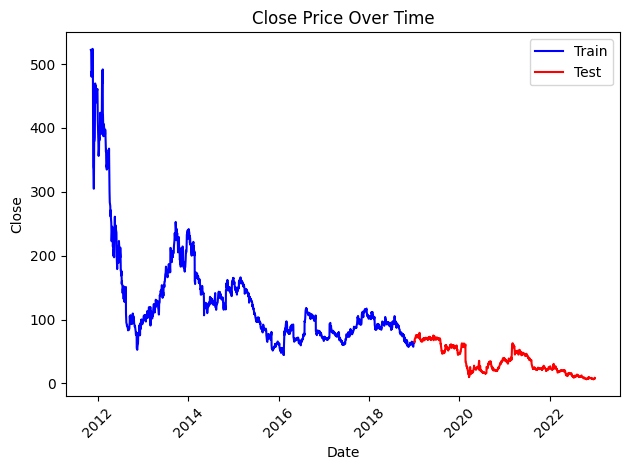

In [2]:
#AAPL
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
period ="train"
data = Data('GRPN',start_date,end_date,period,2019)
data.data_preprocess()

In [3]:
import numpy as np
import matplotlib.pyplot as plt

evolve_strategy = ["ring", "gga"]
num_runs = 5# Number of runs to perform

convergence_values = []

for i in evolve_strategy:
    values = []
    for _ in range(num_runs):
        ga = IslandGGA(data=data.train_data,K=4, num_islands=4, m_iter=5, num_iter=30, pSize=20, r_cross=0.4, r_mut=0.1,
                       strategies=data.strategies, evolve_strategy=i)
        ga.evolve()
        values.append(ga.convergence_values)
    convergence_values.append(np.mean(values, axis=0))  # Average convergence values across runs

# Plot the convergence values for each evolutionary strategy
plt.figure(figsize=(8, 6))
for i in range(len(evolve_strategy)):
    if evolve_strategy[i] =='gga':
        l = "Previous"
    else:
        l ='Proposed ' + str(evolve_strategy[i]).capitalize()
    plt.plot(np.arange(1, 101), convergence_values[i], label=l)
plt.xlabel('Iteration')
plt.ylabel('Convergence value')
plt.title('Convergence values for Proposed Methods')
plt.legend()
plt.show()

Running ring
Generation 1: Best fitness = 2.949729157606172  Average Fitness = 0.13666830026115573
Generation 2: Best fitness = 2.949729157606172  Average Fitness = 0.44986340261579694
Generation 3: Best fitness = 2.949729157606172  Average Fitness = 0.562589541252521
Generation 4: Best fitness = 2.949729157606172  Average Fitness = 0.6725930580558046
Generation 5: Best fitness = 2.949729157606172  Average Fitness = 0.8410489931571793
Island 0 Migration -Left island 3 -Right island 1
Island 1 Migration -Left island 0 -Right island 2
Generation 6: Best fitness = 2.949729157606172  Average Fitness = 1.3835651023566853
Generation 7: Best fitness = 2.949729157606172  Average Fitness = 1.2445159564975237
Generation 8: Best fitness = 2.949729157606172  Average Fitness = 1.6107158747127985
Generation 9: Best fitness = 2.949729157606172  Average Fitness = 1.4988305730466127
Generation 10: Best fitness = 2.949729157606172  Average Fitness = 1.500507376745521
Island 0 Migration -Left island 3 -R

In [ ]:
for i,c in enumerate(ga.population):
    print(f"Chromosome {i}")
    print(c)
    print("==========")

In [ ]:
print(ga.globalBest.binary_to_sltp())

In [ ]:
# Plot the convergence values for each evolutionary strategy
plt.figure(figsize=(8, 6))

plt.plot(np.arange(1, 21), ga.convergence_values, label='Proposed ')
plt.xlabel('Iteration')
plt.ylabel('Convergence value')
plt.title('Convergence values for Proposed Methods')
plt.legend()
plt.show()

In [ ]:


# Monthly returns for each strategy
monthly_returns = data.strategy_performance()


# Determine the grid dimensions
num_strategies = len(monthly_returns.columns)
grid_rows = int(num_strategies / 2)  # Number of rows in the grid
grid_cols = 2  # Number of columns in the grid

# Adjust the figure size based on the number of subplots
fig_width = 12
fig_height = 4 * grid_rows

# Create the subplots with the specified grid dimensions and figure size
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(fig_width, fig_height))

# Flatten the axes array if necessary
if grid_rows > 1:
    axes = axes.flatten()

# Iterate over each strategy and plot its cumulative profits
for idx, (strategy, returns) in enumerate(monthly_returns.iteritems()):
    cumulative_profits = np.cumprod(1 + returns)-1  # Calculate cumulative profits
    ax = axes[idx] if grid_rows > 1 else axes  # Select the correct subplot
    ax.plot(cumulative_profits)
    ax.set_xlabel('Month')
    ax.set_ylabel('Cumulative Profit')
    ax.set_title(f'Cumulative Profits for {strategy}')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


